In [1]:
# Install dependencies
%pip install -q amplpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.6 MB/s eta 0:00:00


In [2]:
# Google Colab & Kaggle integration
from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["highs"],  # modules to install
    license_uuid="default",  # license to use
)  # instantiate AMPL object and register magics

Using default Community Edition License for Colab. Get yours at: https://ampl.com/ce
Licensed to AMPL Community Edition License for the AMPL Model Colaboratory (https://colab.ampl.com).


In [3]:
%%writefile prognaolinear.mod

var X1 >= 0;
var X2 >= 0;
var Z >= 0;

  #funcao objetivo
maximize fo: Z;

  #restricoes
subject to R1:
  1 * X1 + 0 * X2 <= 4;

subject to R2:
  0 * X1 + 2 * X2 <= 12;

subject to R3:
  3 * X1 + 2 * X2 <= 18;

subject to R4:
  Z >= 0;

subject to R5:
  Z =  3000 * X1 + 5000 * X2;


Writing prognaolinear.mod


In [4]:
#printando Z, x1 e x2
%%ampl_eval
reset;
model prognaolinear.mod;
option solver highs;
solve;
display Z;
display X1;
display X2;
reset;

HiGHS 1.5.3: HiGHS 1.5.3: optimal solution; objective 36000
1 simplex iterations
0 barrier iterations
 
Z = 36000

X1 = 2

X2 = 6



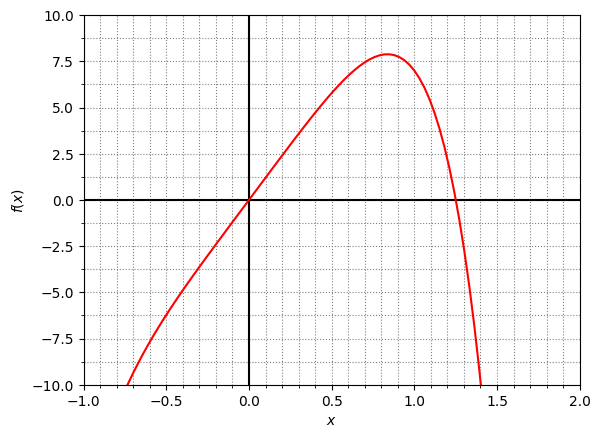

In [15]:
# PNL - Bisseção - Grafico
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
xMin = -1.0
xMax = 2.0
yMin = -10.0
yMax = 10.0

# Exibe gráfico f(x) no intervalo fornecido no livro
x_plot = np.linspace(xMin, xMax,100) # 100 pontos no intervalo [0.4,1.8]
f_x_plot = 12*x_plot - 3*x_plot**4 - 2*x_plot**6 # f(x) é declarada considerando o linspace
fig, ax = plt.subplots() # cria figura
ax.grid(True, which = 'both', color = 'grey', linestyle = 'dotted') # configure linhas de grade
ax.axvline(x=0, color ='k')
ax.axhline(y=0, color ='k') # cores dos eixos x e y
ax.axis((xMin, xMax, yMin, yMax)) #limites dos eixos x e y
ax.xaxis.set_minor_locator(AutoMinorLocator(5)) # inclui 5 linhas secundarias para cada linha primaria
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.plot(x_plot, f_x_plot, color = 'r')
plt.show()


In [30]:
from sympy.core.evalf import evalf
# PNL - Bisseção - Algoritmo
import sympy as sym # biblioteca para matematica simbolica

x = sym.symbols('x') # define variavel
f_x = 12*x - 3*x**4 - 2*x**6 # função f(x)
x_inf = -0 # limite inferior (x sublinhado)
x_sup = 2 # limite superior (x barra)
Epsilon =0.01 # Erro admitido para x*

x_ini = np.float128((x_inf + x_sup)/2) #x_i
Ite = 0
d_f_x = sym.diff(f_x,x) #df(x)\dx
print('Ite ;     df(x)\dx ;     x_inf ;      x_sup; nov x_ini ;  f(x_ini) ;') # imprime cabecalho da tabela
print('%4.d' % Ite, ';             ;', '%9.5f' % x_inf, ';','%9.5f' % x_sup, ';','%9.5f' % x_ini, ';',
      '%10.5f' % f_x.evalf(subs={x:x_ini}),';') # imprime linha de inciação
continuar = True
while continuar: # processo iterativo
  Ite+=1
  valor = d_f_x.evalf(subs={x:x_ini}) # calcula o valor de d_f_x en x=x_ini
  if valor >= 0: #verifica qual limite ajustar
    x_inf = x_ini
  else:
      x_sup = x_ini
  x_ini_novo = np.float128((x_inf + x_sup)/2) #atualizar x_ini
  print('%4.d' % Ite, ';', '%11.5f' % d_f_x.evalf(subs ={x:x_ini}), ';','%9.5f' % x_inf, ';','%9.5f' % x_sup, ';'
        ,'%9.5f' % x_ini_novo, ';','%9.5f' % f_x.evalf(subs={x:x_ini_novo}), ';') # imprime linha de iteração
  x_ini = x_ini_novo
  if (x_sup - x_inf) <= 2*Epsilon: # varifica criterio de parada
    continuar = False


Ite ;     df(x)\dx ;     x_inf ;      x_sup; nov x_ini ;  f(x_ini) ;
   0 ;             ;   0.00000 ;   2.00000 ;   1.00000 ;    7.00000 ;
   1 ;   -12.00000 ;   0.00000 ;   1.00000 ;   0.50000 ;   5.78125 ;
   2 ;    10.12500 ;   0.50000 ;   1.00000 ;   0.75000 ;   7.69482 ;
   3 ;     4.08984 ;   0.75000 ;   1.00000 ;   0.87500 ;   7.84386 ;
   4 ;    -2.19397 ;   0.75000 ;   0.87500 ;   0.81250 ;   7.86718 ;
   5 ;     1.31437 ;   0.81250 ;   0.87500 ;   0.84375 ;   7.88291 ;
   6 ;    -0.33970 ;   0.81250 ;   0.84375 ;   0.82812 ;   7.88150 ;
   7 ;     0.51125 ;   0.82812 ;   0.84375 ;   0.83594 ;   7.88387 ;
